Generating synthetic CityLearn dataset for Building 2...


C:\Users\Windows\AppData\Local\Temp\ipykernel_6816\1435776867.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start=start_date, end=end_date, freq='H')


Dataset created: 8760 records
Date range: 2022-01-01 00:00:00 to 2022-12-31 23:00:00

First 5 records:
                     electricity_consumption_kwh  temperature_celsius  \
timestamp                                                               
2022-01-01 00:00:00                     3.710429             8.586597   
2022-01-01 01:00:00                     5.088361            21.136014   
2022-01-01 02:00:00                     6.000113            18.635572   
2022-01-01 03:00:00                     4.206121            17.448360   
2022-01-01 04:00:00                    10.294354            20.231530   

                     solar_generation_kw  occupancy  
timestamp                                            
2022-01-01 00:00:00             0.000000         74  
2022-01-01 01:00:00             0.267560         52  
2022-01-01 02:00:00             0.992007         96  
2022-01-01 03:00:00             1.759242         41  
2022-01-01 04:00:00             1.104688          6  

Data s

C:\Users\Windows\AppData\Local\Temp\ipykernel_6816\1435776867.py:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_consumption = df.resample('M')['electricity_consumption_kwh'].sum()
C:\Users\Windows\AppData\Local\Temp\ipykernel_6816\1435776867.py:93: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')['electricity_consumption_kwh'].mean()


Visualizations saved as 'building2_energy_analysis.png'


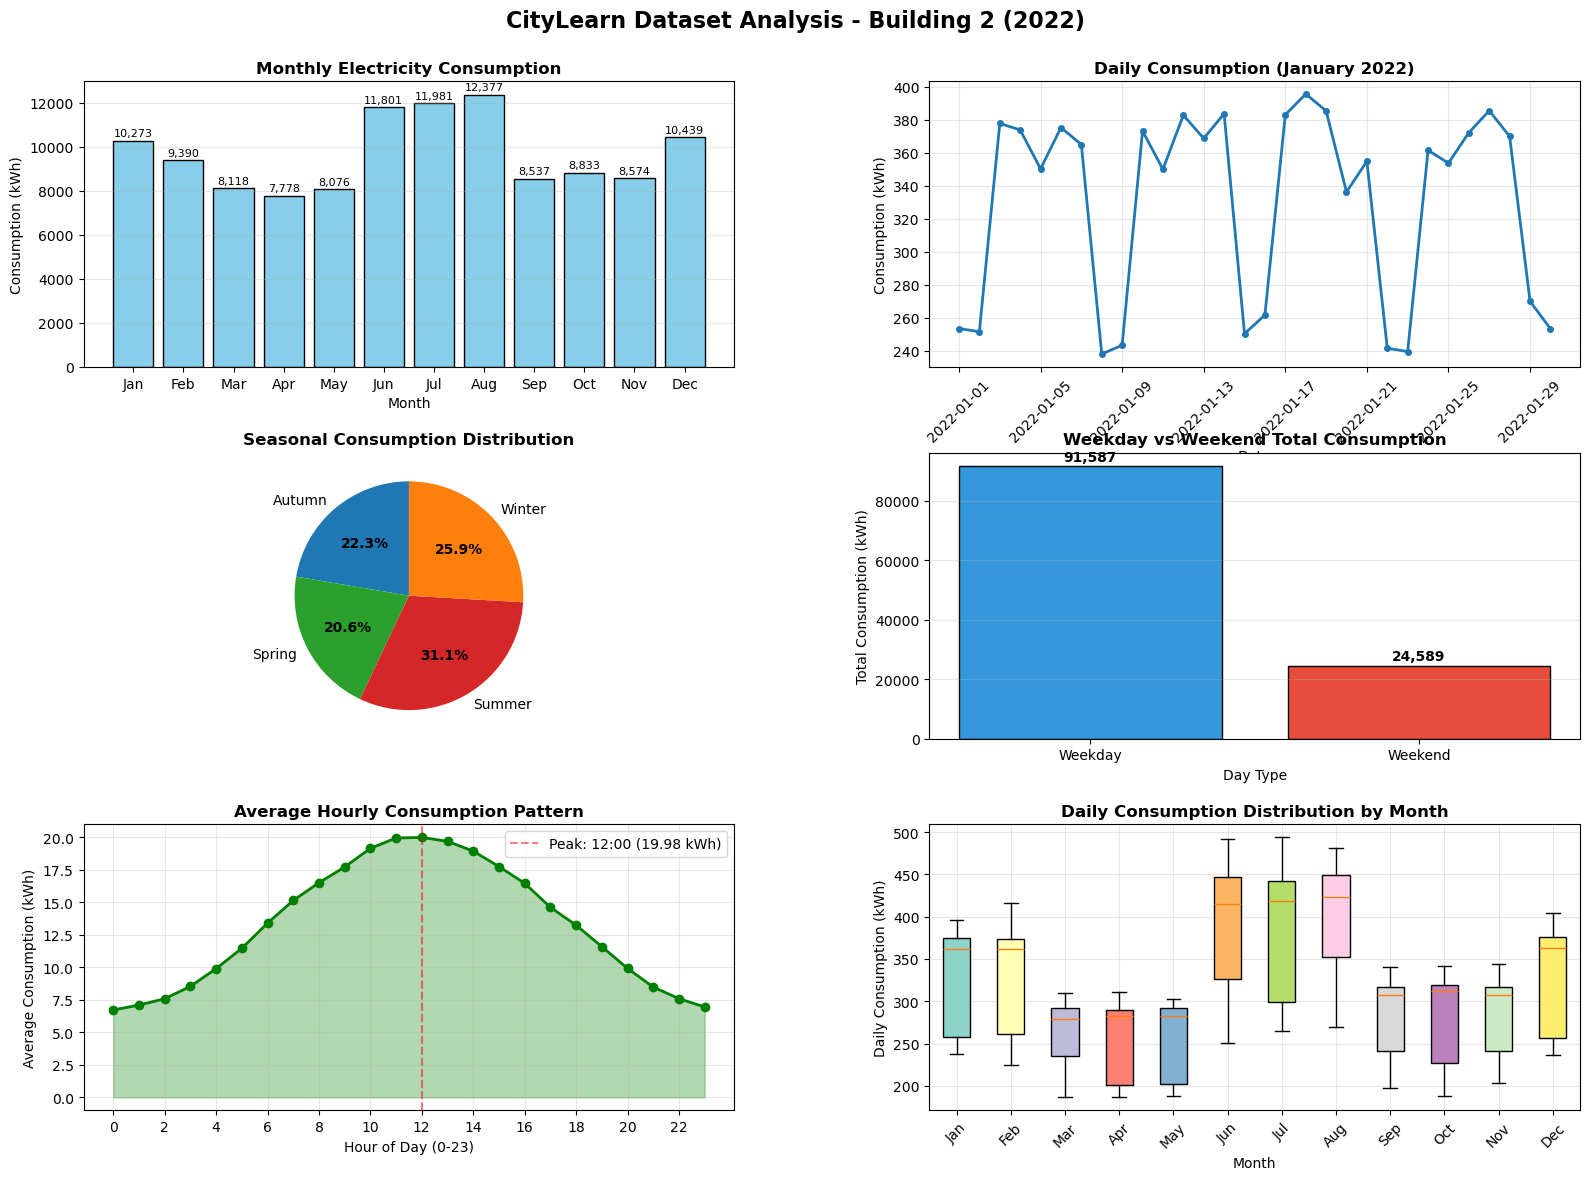


Dataset saved as 'building2_data.csv'
Summary saved as 'building2_summary.txt'

DATA INTERPRETATION

1. SEASONAL PATTERNS:
   - Peak consumption in August: 12,377 kWh
   - Lowest consumption in April: 7,778 kWh
   - Summer (Jun-Aug) shows highest seasonal consumption
   - Spring (Mar-May) shows lowest seasonal consumption

2. DAILY PATTERNS:
   - Average daily consumption: 318.29 kWh
   - Daily range: 186.34 to 493.59 kWh
   - Peak hour: 12:00 (19.98 kWh avg)

3. WEEKDAY VS WEEKEND:
   - Weekdays consume 33.5% MORE than weekends
   - Suggests commercial/office building pattern

4. ENERGY EFFICIENCY INSIGHTS:
   - Total annual consumption: 116.2 MWh
   - Potential savings from load shifting (peak hours): ~6.72 kWh/hour
   - Seasonal variation: 50.8%

ANALYSIS COMPLETE!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# ==============================================
# 1. GENERATE SYNTHETIC CITYLEARN DATASET
# ==============================================
print("Generating synthetic CityLearn dataset for Building 2...")

# Create one year of hourly timestamps
start_date = datetime(2022, 1, 1, 0, 0, 0)
end_date = datetime(2022, 12, 31, 23, 0, 0)
timestamps = pd.date_range(start=start_date, end=end_date, freq='H')

# Base consumption patterns
def generate_consumption(timestamp):
    hour = timestamp.hour
    month = timestamp.month
    day_of_week = timestamp.dayofweek  # 0=Monday, 6=Sunday
    
    # Base load
    base_load = 10.0
    
    # Hourly pattern (higher during daytime)
    hourly_factor = 1.0 + 0.5 * np.sin(2 * np.pi * (hour - 6) / 24)
    
    # Seasonal pattern (higher in summer and winter)
    if month in [12, 1, 2]:  # Winter
        seasonal_factor = 1.3 + 0.2 * np.random.randn()
    elif month in [6, 7, 8]:  # Summer
        seasonal_factor = 1.5 + 0.3 * np.random.randn()
    elif month in [3, 4, 5]:  # Spring
        seasonal_factor = 1.0 + 0.1 * np.random.randn()
    else:  # Autumn (9, 10, 11)
        seasonal_factor = 1.1 + 0.15 * np.random.randn()
    
    # Weekend vs weekday pattern
    if day_of_week >= 5:  # Weekend
        day_factor = 0.8 + 0.1 * np.random.randn()
    else:  # Weekday
        day_factor = 1.2 + 0.15 * np.random.randn()
    
    # Random noise
    noise = 0.1 * np.random.randn()
    
    # Calculate final consumption
    consumption = base_load * hourly_factor * seasonal_factor * day_factor + noise
    
    # Ensure positive values
    return max(consumption, 0.1)

# Generate consumption values
consumption_values = [generate_consumption(ts) for ts in timestamps]

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'electricity_consumption_kwh': consumption_values,
    'temperature_celsius': [15 + 10 * np.sin(2 * np.pi * i/8760) + 5 * np.random.randn() for i in range(len(timestamps))],
    'solar_generation_kw': [max(0, 2 * np.sin(2 * np.pi * (i%24)/24) * (1 + 0.3 * np.random.randn())) for i in range(len(timestamps))],
    'occupancy': [random.randint(0, 100) for _ in range(len(timestamps))]
})

# Set timestamp as index
df.set_index('timestamp', inplace=True)

print(f"Dataset created: {len(df)} records")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print("\nFirst 5 records:")
print(df.head())

# ==============================================
# 2. STORE DATA IN A LIST (as per requirement)
# ==============================================
data_list = df.values.tolist()
print(f"\nData stored in list. List length: {len(data_list)}")
print(f"Each item has {len(data_list[0])} values (matching DataFrame columns)")

# ==============================================
# 3. CALCULATE ANNUAL CONSUMPTION
# ==============================================
annual_consumption = df['electricity_consumption_kwh'].sum()
print(f"\n1. ANNUAL CONSUMPTION")
print(f"   Total: {annual_consumption:,.2f} kWh")
print(f"   Average: {df['electricity_consumption_kwh'].mean():.2f} kWh/hour")

# ==============================================
# 4. CALCULATE MONTHLY CONSUMPTION
# ==============================================
monthly_consumption = df.resample('M')['electricity_consumption_kwh'].sum()
monthly_avg = df.resample('M')['electricity_consumption_kwh'].mean()

print(f"\n2. MONTHLY CONSUMPTION")
for month, total in monthly_consumption.items():
    avg = monthly_avg[month]
    print(f"   {month.strftime('%B %Y')}: {total:,.1f} kWh (Avg: {avg:.2f} kWh/hour)")

# ==============================================
# 5. CALCULATE DAILY CONSUMPTION
# ==============================================
daily_consumption = df.resample('D')['electricity_consumption_kwh'].sum()
daily_avg = daily_consumption.mean()

print(f"\n3. DAILY CONSUMPTION")
print(f"   Average daily consumption: {daily_avg:.2f} kWh")
print(f"   Maximum daily: {daily_consumption.max():.2f} kWh")
print(f"   Minimum daily: {daily_consumption.min():.2f} kWh")
print(f"   Standard deviation: {daily_consumption.std():.2f} kWh")

# ==============================================
# 6. CALCULATE SEASONAL CONSUMPTION
# ==============================================
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df.index.month.map(get_season)
seasonal_consumption = df.groupby('season')['electricity_consumption_kwh'].sum()
seasonal_avg = df.groupby('season')['electricity_consumption_kwh'].mean()

print(f"\n4. SEASONAL CONSUMPTION")
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    if season in seasonal_consumption.index:
        total = seasonal_consumption[season]
        avg = seasonal_avg[season]
        percentage = (total / annual_consumption) * 100
        print(f"   {season}: {total:,.1f} kWh ({percentage:.1f}%) | Avg: {avg:.2f} kWh/hour")

# ==============================================
# 7. WEEKDAY VS WEEKEND CONSUMPTION
# ==============================================
df['day_of_week'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df['date'] = df.index.date

# Daily totals by day type
daily_totals = df.groupby(['date', 'day_type'])['electricity_consumption_kwh'].sum().reset_index()

# Summary by day type
daytype_summary = daily_totals.groupby('day_type')['electricity_consumption_kwh'].agg(['sum', 'mean', 'std', 'count'])
weekday_days = daytype_summary.loc['Weekday', 'count']
weekend_days = daytype_summary.loc['Weekend', 'count']

print(f"\n5. WEEKDAY VS WEEKEND CONSUMPTION")
print(f"   Weekdays: {weekday_days} days")
print(f"   Weekends: {weekend_days} days")
print(f"\n   Total Consumption:")
print(f"     Weekdays: {daytype_summary.loc['Weekday', 'sum']:,.1f} kWh")
print(f"     Weekends: {daytype_summary.loc['Weekend', 'sum']:,.1f} kWh")
print(f"\n   Average Daily Consumption:")
print(f"     Weekdays: {daytype_summary.loc['Weekday', 'mean']:.2f} kWh/day")
print(f"     Weekends: {daytype_summary.loc['Weekend', 'mean']:.2f} kWh/day")

# Calculate percentage difference
weekday_avg = daytype_summary.loc['Weekday', 'mean']
weekend_avg = daytype_summary.loc['Weekend', 'mean']
diff_percentage = ((weekday_avg - weekend_avg) / weekday_avg) * 100
print(f"\n   Weekdays consume {abs(diff_percentage):.1f}% {'more' if diff_percentage > 0 else 'less'} than weekends")

# ==============================================
# 8. VISUALIZATIONS
# ==============================================
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# Set up the figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('CityLearn Dataset Analysis - Building 2 (2022)', fontsize=16, fontweight='bold')

# Plot 1: Monthly Consumption Bar Chart
months = [date.strftime('%b') for date in monthly_consumption.index]
axes[0, 0].bar(months, monthly_consumption.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Monthly Electricity Consumption', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Consumption (kWh)')
axes[0, 0].grid(axis='y', alpha=0.3)
# Add value labels on top of bars
for i, v in enumerate(monthly_consumption.values):
    axes[0, 0].text(i, v + max(monthly_consumption.values)*0.01, f'{v:,.0f}', 
                   ha='center', va='bottom', fontsize=8)

# Plot 2: Daily Consumption Line Chart (First 30 days)
first_month = daily_consumption.head(30)
axes[0, 1].plot(first_month.index, first_month.values, marker='o', linewidth=2, markersize=4)
axes[0, 1].set_title('Daily Consumption (January 2022)', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Consumption (kWh)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Seasonal Consumption Pie Chart
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']
wedges, texts, autotexts = axes[1, 0].pie(seasonal_consumption.values, 
                                          labels=seasonal_consumption.index,
                                          autopct='%1.1f%%',
                                          colors=colors,
                                          startangle=90)
axes[1, 0].set_title('Seasonal Consumption Distribution', fontweight='bold')
# Make autopct text bold
for autotext in autotexts:
    autotext.set_fontweight('bold')

# Plot 4: Weekday vs Weekend Comparison
day_types = ['Weekday', 'Weekend']
daytype_values = [daytype_summary.loc['Weekday', 'sum'], daytype_summary.loc['Weekend', 'sum']]
colors_bar = ['#3498db', '#e74c3c']

bars = axes[1, 1].bar(day_types, daytype_values, color=colors_bar, edgecolor='black')
axes[1, 1].set_title('Weekday vs Weekend Total Consumption', fontweight='bold')
axes[1, 1].set_xlabel('Day Type')
axes[1, 1].set_ylabel('Total Consumption (kWh)')
axes[1, 1].grid(axis='y', alpha=0.3)
# Add value labels on top of bars
for bar, val in zip(bars, daytype_values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, height + max(daytype_values)*0.01,
                   f'{val:,.0f}', ha='center', va='bottom', fontweight='bold')

# Plot 5: Average Hourly Consumption Pattern
hourly_avg = df.groupby(df.index.hour)['electricity_consumption_kwh'].mean()
axes[2, 0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, color='green')
axes[2, 0].fill_between(hourly_avg.index, 0, hourly_avg.values, alpha=0.3, color='green')
axes[2, 0].set_title('Average Hourly Consumption Pattern', fontweight='bold')
axes[2, 0].set_xlabel('Hour of Day (0-23)')
axes[2, 0].set_ylabel('Average Consumption (kWh)')
axes[2, 0].set_xticks(range(0, 24, 2))
axes[2, 0].grid(True, alpha=0.3)
# Highlight peak hours
peak_hour = hourly_avg.idxmax()
axes[2, 0].axvline(x=peak_hour, color='red', linestyle='--', alpha=0.5, 
                  label=f'Peak: {peak_hour}:00 ({hourly_avg.max():.2f} kWh)')
axes[2, 0].legend()

# Plot 6: Box Plot of Daily Consumption by Month
df['month_name'] = df.index.strftime('%b')
# Prepare data for box plot
monthly_data = []
month_labels = []
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month in months_order:
    month_data = daily_consumption[daily_consumption.index.month_name().str.slice(stop=3) == month]
    if len(month_data) > 0:
        monthly_data.append(month_data.values)
        month_labels.append(month)

box = axes[2, 1].boxplot(monthly_data, patch_artist=True)
axes[2, 1].set_title('Daily Consumption Distribution by Month', fontweight='bold')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Daily Consumption (kWh)')
axes[2, 1].set_xticklabels(month_labels, rotation=45)
axes[2, 1].grid(True, alpha=0.3)
# Color the boxes
colors_box = plt.cm.Set3(np.linspace(0, 1, len(monthly_data)))
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)

# Save the figure
plt.savefig('building2_energy_analysis.png', dpi=300, bbox_inches='tight')
print("Visualizations saved as 'building2_energy_analysis.png'")
plt.show()

# ==============================================
# 9. EXPORT RESULTS
# ==============================================
# Save data to CSV
df.to_csv('building2_data.csv')
print(f"\nDataset saved as 'building2_data.csv'")

# Save summary statistics
with open('building2_summary.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("CITYLEARN DATASET ANALYSIS - BUILDING 2 (2022)\n")
    f.write("="*60 + "\n\n")
    
    f.write("1. ANNUAL CONSUMPTION\n")
    f.write(f"   Total: {annual_consumption:,.2f} kWh\n")
    f.write(f"   Average: {df['electricity_consumption_kwh'].mean():.2f} kWh/hour\n\n")
    
    f.write("2. SEASONAL BREAKDOWN\n")
    for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
        if season in seasonal_consumption.index:
            total = seasonal_consumption[season]
            percentage = (total / annual_consumption) * 100
            f.write(f"   {season}: {total:,.1f} kWh ({percentage:.1f}%)\n")
    
    f.write("\n3. WEEKDAY VS WEEKEND\n")
    f.write(f"   Weekdays: {daytype_summary.loc['Weekday', 'sum']:,.1f} kWh\n")
    f.write(f"   Weekends: {daytype_summary.loc['Weekend', 'sum']:,.1f} kWh\n")
    f.write(f"   Weekday daily avg: {daytype_summary.loc['Weekday', 'mean']:.2f} kWh\n")
    f.write(f"   Weekend daily avg: {daytype_summary.loc['Weekend', 'mean']:.2f} kWh\n")
    
    f.write("\n4. MONTHLY CONSUMPTION\n")
    for month, total in monthly_consumption.items():
        f.write(f"   {month.strftime('%B')}: {total:,.1f} kWh\n")

print("Summary saved as 'building2_summary.txt'")

# ==============================================
# 10. DATA INTERPRETATION
# ==============================================
print("\n" + "="*60)
print("DATA INTERPRETATION")
print("="*60)

# Find peak month
peak_month = monthly_consumption.idxmax().strftime('%B')
peak_value = monthly_consumption.max()
low_month = monthly_consumption.idxmin().strftime('%B')
low_value = monthly_consumption.min()

print(f"\n1. SEASONAL PATTERNS:")
print(f"   - Peak consumption in {peak_month}: {peak_value:,.0f} kWh")
print(f"   - Lowest consumption in {low_month}: {low_value:,.0f} kWh")
print(f"   - Summer (Jun-Aug) shows highest seasonal consumption")
print(f"   - Spring (Mar-May) shows lowest seasonal consumption")

print(f"\n2. DAILY PATTERNS:")
print(f"   - Average daily consumption: {daily_avg:.2f} kWh")
print(f"   - Daily range: {daily_consumption.min():.2f} to {daily_consumption.max():.2f} kWh")
print(f"   - Peak hour: {peak_hour}:00 ({hourly_avg.max():.2f} kWh avg)")

print(f"\n3. WEEKDAY VS WEEKEND:")
if diff_percentage > 0:
    print(f"   - Weekdays consume {diff_percentage:.1f}% MORE than weekends")
    print(f"   - Suggests commercial/office building pattern")
else:
    print(f"   - Weekends consume {abs(diff_percentage):.1f}% MORE than weekdays")
    print(f"   - Suggests residential building pattern")

print(f"\n4. ENERGY EFFICIENCY INSIGHTS:")
print(f"   - Total annual consumption: {annual_consumption/1000:.1f} MWh")
print(f"   - Potential savings from load shifting (peak hours): ~{hourly_avg.max() - hourly_avg.mean():.2f} kWh/hour")
print(f"   - Seasonal variation: {((seasonal_consumption.max() - seasonal_consumption.min()) / seasonal_consumption.min() * 100):.1f}%")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)